# Crash Course on Julia

Undergraduate Computational Macro

Jesse Perla (University of British Columbia)

# Introduction to Julia

## Introductory Lectures

-   See [intro lecture](intro.qmd#setup-environment) for environment
    setup instructions
-   Assuming you are familiar with Matlab or Python, Julia will be easy
    to learn
-   Adapted from QuantEcon lectures coauthored with John Stachurski and
    Thomas J. Sargent
    -   [Julia by
        Example](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)
    -   [Essentials](https://julia.quantecon.org/getting_started_julia/julia_essentials.html)
    -   [Fundamental
        Types](https://julia.quantecon.org/getting_started_julia/fundamental_types.html)
-   [SciML Cheat
    Sheet](https://sciml.github.io/Scientific_Modeling_Cheatsheet/scientific_modeling_cheatsheet)
    for Matlab/Python/Julia

## Using Packages

-   First ensure your project is activated and packages instantiated

In [1]:
using LinearAlgebra, Statistics, Plots, Distributions, Random

# Basic Operations and Control Flow

## Plotting Random Numbers


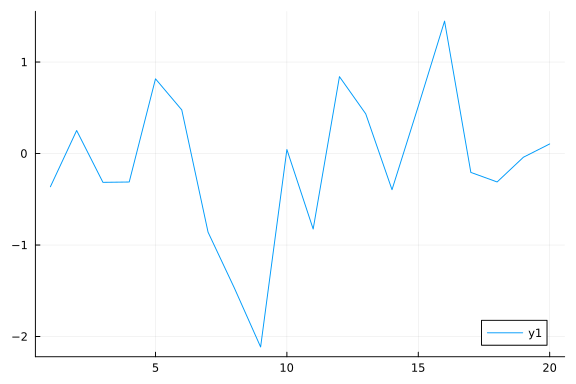

In [1]:
Random.seed!(42) # for reproducibility
n = 20
ep = randn(n)
plot(1:n, ep;size=(600,400))

## Loops

In [1]:
n = 100
ep = zeros(n)
for i in 1:n
    ep[i] = randn()
end
println(ep[1:5])

[-0.9654904870197227, 0.9656607495563969, 1.3110173557334994, 0.4041754007591603, 1.1979596698125403]

## While Loops and `break`

In [1]:
i = 1
total = 0.0
while i <= 10
    total += rand()
    if total > 2.0
        break # leave the loop early when condition met
    end
    i += 1
end
@show i, total;

(i, total) = (4, 2.1678515649076444)

## Comprehensions

In [1]:
# Comprehensions
@show [2 * i for i in 1:4];

[2i for i = 1:4] = [2, 4, 6, 8]

## Manually Calculated Mean

In [1]:
ep_sum = 0.0 # careful to use 0.0 here, instead of 0
for ep_val in ep
    ep_sum = ep_sum + ep_val
end
@show ep_mean = ep_sum / length(ep)
@show ep_mean ≈ mean(ep)
@show ep_mean
@show sum(ep) / length(ep)
@show sum(ep_val for ep_val in ep) / length(ep); # generator/comprehension

ep_mean = ep_sum / length(ep) = -0.10436111001880369
ep_mean ≈ mean(ep) = true
ep_mean = -0.10436111001880369
sum(ep) / length(ep) = -0.10436111001880365
sum((ep_val for ep_val = ep)) / length(ep) = -0.10436111001880369

## String Interpolation

-   Use `$name` for variables or `$(expr)` for expressions inside
    strings

In [1]:
name = "Julia"
x = 3
println("Hello $name, 2x = $(2x)")

Hello Julia, 2x = 6

## Macros and `@show`

-   Macros (prefixed with `@`) transform code before execution; `@show`
    is a handy debug macro

In [1]:
a = 1 + 2
@show a
@show sum(randn(3));

a = 3
sum(randn(3)) = 0.9905223195566424

# Functions and Functional Programming

## Functions

In [1]:
function generatedata(n)
    ep = randn(n) # use built in function
    for i in eachindex(ep) # or i in 1:length(ep)
        ep[i] = ep[i]^2 # squaring the result
    end
    return ep
end
data = generatedata(5)
println(data)

[0.45629390661111663, 2.239276519973084, 0.012093086182622361, 0.8178133947622638, 0.029520710239712283]

## Broadcasting

In [1]:
function generatedata(n)
    ep = randn(n) # use built in function
    return ep .^ 2
end
@show generatedata(5)
generatedata2(n) = randn(n) .^ 2
@show generatedata2(5);

generatedata(5) = [0.7936585609350724, 2.54008455063787, 0.03630079956534469, 1.0596951950031361, 0.026581091545836936]
generatedata2(5) = [0.12012915959661571, 0.14908580134436417, 1.2037454134039276, 0.014073031953049788, 3.7808480859126736]

## Higher Order Functions

In [1]:
generatedata3(n, gen) = gen.(randn(n)) # broadcasts on gen
f(x) = x^2 # simple square function
@show generatedata3(5, f); # applies f

generatedata3(5, f) = [0.7121322893565936, 0.0185955776623056, 0.0912022660336257, 0.11442078211374904, 0.25477412900679614]

# Plotting and Visualization

## More Plotting Examples


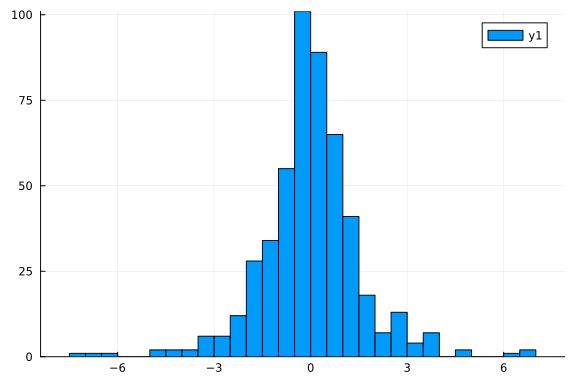

In [1]:
using Distributions
function plothistogram(dist, n)
    # n draws from distribution
    ep = rand(dist, n) 
    return histogram(ep;size=(600,400))
end
dist = Laplace() # dist != dist in function
plothistogram(dist, 500)

## Changing Types

-   The `rand(dist, n)` changes its behavior based on the type of `dist`


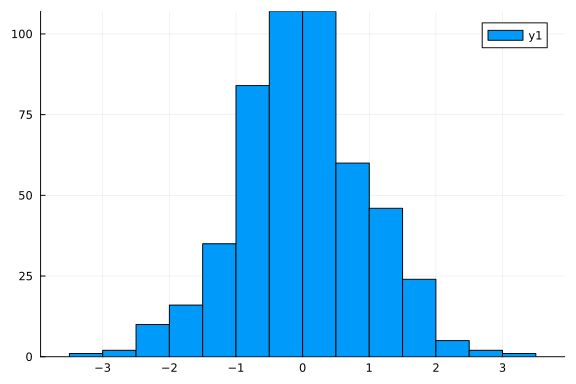

In [1]:
dist = Normal()
plothistogram(Normal(), 500)

## Ranges

x = 0.0:0.25:1.0
Vector(x) = [0.0, 0.25, 0.5, 0.75, 1.0]


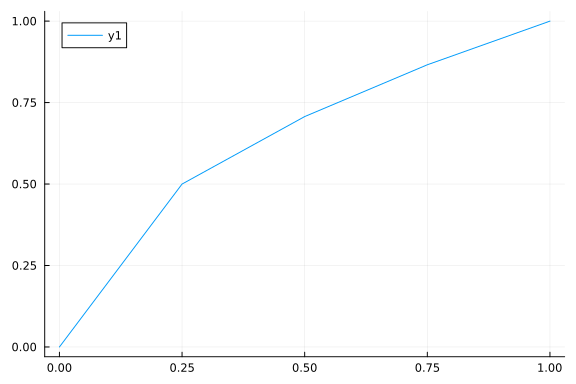

In [1]:
x = range(0.0, 1.0; length = 5)
@show x
@show Vector(x)
plot(x, sqrt.(x); size=(600,400))

## Defining Functions

-   You can create anonymous functions as in R, but it is harder for the
    compiler because the type `f3` can change. Avoid `->` if name
    required

In [1]:
f(x) = x^2
function f2(x)
    return x^2
end
f3 = x -> x^2 # assignment not required
@show f(2), f2(2), f3(2);

(f(2), f2(2), f3(2)) = (4, 4, 4)

## Default Function Arguments

In [1]:
f(x, a = 1) = exp(cos(a * x))
@show f(pi)
@show f(pi, 2);

f(pi) = 0.36787944117144233
f(pi, 2) = 2.718281828459045

## Keyword Arguments

In [1]:
f2(x; a = 1) = exp(cos(a * x))  # note the ; in the definition
# same as longform
function f(x; a = 1)
    return exp(cos(a * x))
end
@show f(pi)
@show f(pi; a = 2) # passing in adate
a = 2
@show f(pi; a); # equivalent to f(pi; a = a)

f(pi) = 0.36787944117144233
f(pi; a = 2) = 2.718281828459045
f(pi; a) = 2.718281828459045

## Closures

-   In general, try to avoid globals and closures outside of functions

In [1]:
a = 0.2
f(x) = a * x^2  # refers to the `a` in the outer scope
@show f(1)
# The a is captured in this scope by name.  Careful!
a = 0.3
@show f(1);

f(1) = 0.2
f(1) = 0.3

## Closures Inside Functions

-   But within a function they are safe, common, and usually free of
    overhead

In [1]:
function g(a)
    f(x) = a * x^2  # refers to the `a` passed in the function
    return f(1)
end
a = 123.5 # Different scope than the `a` in function
@show g(0.2);

g(0.2) = 0.2

# Data Structures

## Tuples and Named Tuples

In [1]:
t = (1, 2.0, "hello")
@show t[1]
nt = (; a = 1, b = 2.0, c = "hello")
@show nt
@show nt.a; # can't use nt[1] or nt["a"]

t[1] = 1
nt = (a = 1, b = 2.0, c = "hello")
nt.a = 1

## Tuples Packing and Unpacking

In [1]:
function solve_model(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (; a, b, c)  # note local scope of tuples!
end
@show solve_model(0.1)
# can unpack in different order, or use subset of values
(; c, a) = solve_model(0.1)
println("a = $a, c = $c");

solve_model(0.1) = (a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)
a = 0.010000000000000002, c = 0.030000000000000006

# Arrays and Linear Algebra

## Array Basics

In [1]:
b = [1.0, 2.1, 3.0] # 1d array
A = [1 2; 3 4] # 2x2 matrix
@show size(b)
@show size(A)
@show typeof(b)
@show typeof(A)
@show zeros(3)
@show ones(2, 2)
@show fill(1.0, 2, 2)
@show similar(A)
@show A[1, 1]
@show A[1, :]
@show A[1:end, 1];

size(b) = (3,)
size(A) = (2, 2)
typeof(b) = Vector{Float64}
typeof(A) = Matrix{Int64}
zeros(3) = [0.0, 0.0, 0.0]
ones(2, 2) = [1.0 1.0; 1.0 1.0]
fill(1.0, 2, 2) = [1.0 1.0; 1.0 1.0]
similar(A) = [140033842892576 140033842892608; 140033842892592 140034887560608]
A[1, 1] = 1
A[1, :] = [1, 2]
A[1:end, 1] = [1, 3]

## Useful Array Helpers

In [1]:
x = [1.0, -1.0, 2.5, -0.5]
@show cumsum(x)
g(x) = x > 1.0
@show findfirst(g, x) # 1-based index of first match
# equivalent anonymous function versions:
val_1 = findfirst(x_val -> x_val > 1.0, x)
val_2 = findfirst(x -> x > 1.0, x) # note scope!
@show val_1, val_2;

cumsum(x) = [1.0, 0.0, 2.5, 2.0]
findfirst(g, x) = 3
(val_1, val_2) = (3, 3)

## Linear Algebra Basics

In [1]:
A = [1 2; 3 4]
b = [1, 2]
@show A * b # Matrix product
@show A' # transpose
@show dot(b, [5.0, 2.0]) # dot product
@show b' * b # dot product
@show Diagonal([1.0, 2.0]) # diagonal matrix
@show I # identity matrix
@show inv(A); # inverse

A * b = [5, 11]
A' = [1 3; 2 4]
dot(b, [5.0, 2.0]) = 9.0
b' * b = 5
Diagonal([1.0, 2.0]) = Diagonal([1.0, 2.0])
I = LinearAlgebra.UniformScaling{Bool}(true)
inv(A) = [-1.9999999999999996 0.9999999999999998; 1.4999999999999998 -0.4999999999999999]

## Norms

-   Defaults to the Euclidean (2) norm; use `norm(v, 1)` or
    `norm(v, Inf)` for others

In [1]:
v = [3.0, -4.0, 1.0]
manual_euclid1 = sqrt(sum(v.^2))
manual_euclid2 = sqrt(sum(abs2, v)) # sum can apply function first
@show norm(v)
@show manual_euclid1, manual_euclid2
@show norm(v, 1)
@show norm(v, Inf);

norm(v) = 5.0990195135927845
(manual_euclid1, manual_euclid2) = (5.0990195135927845, 5.0990195135927845)
norm(v, 1) = 8.0
norm(v, Inf) = 4.0

## Linear Solves

In [1]:
A = [2.0 1.0; 1.0 3.0]
b = [1.0, 0.0]
x = A \ b # preferred over inv(A) * b
@show x
@show norm(A * x - b); # residual norm

x = [0.6, -0.2]
norm(A * x - b) = 5.551115123125783e-17

## Eigenvalues and Eigenvectors

In [1]:
A = [2.0 1.0; 1.0 2.0]
vals = eigvals(A)
F = eigen(A)
@show vals
@show F.vectors[:, 1];

vals = [1.0, 3.0]
F.vectors[:, 1] = [-0.7071067811865475, 0.7071067811865475]

## Modifying Vectors

-   Scalars and tuples/named tuples are immutable
-   Vectors and matrices are mutable

In [1]:
A = [1 2; 3 4]
A[1, 1] = 2
@show A
b = [1, 2]
b[1] = 2
@show b
b .= [3, 4] # otherwise just renamed
@show b
A[1, :] .= [3, 4] # assign slice
@show A;

A = [2 2; 3 4]
b = [2, 2]
b = [3, 4]
A = [3 4; 3 4]

## Slicing Higher-D Arrays

-   Julia is column-major; slicing by the last index stays contiguous
    and fast
-   Loop order: vary first index fastest for best cache performance

In [1]:
X = reshape(collect(1:24), 2, 3, 4) # 2×3×4 tensor
@show size(X)
M2 = X[:, :, 2] # 2×3 matrix view, contiguous in memory
@show M2
@show view(X, :, :, 2) # does not allocate, nice if contiguous
@show X[1, :, 2]; # row slice from that matrix

size(X) = (2, 3, 4)
M2 = [7 9 11; 8 10 12]
view(X, :, :, 2) = [7 9 11; 8 10 12]
X[1, :, 2] = [7, 9, 11]

## Learning More

-   Clone the QuantEcon lectures
    -   `> Git: Clone` the
        `https://github.com/quantecon/lecture-julia.notebooks`
-   This covers part of [Julia
    Essentials](https://julia.quantecon.org/getting_started_julia/julia_essentials.html)
    and [Fundamental
    Types](https://julia.quantecon.org/getting_started_julia/fundamental_types.html)
-   Other more advanced lectures, not required for this course, are
    -   [Introduction to Types and Generic
        Programming](https://julia.quantecon.org/more_julia/generic_programming.html)
    -   [Generic
        Programming](https://julia.quantecon.org/more_julia/generic_programming.html)
    -   [Visual Studio and Other
        Tools](https://julia.quantecon.org/software_engineering/tools_editors.html)